In [1]:
import matplotlib.pyplot as plt
import pandas as pd

ebola = pd.read_csv('./data/ebola_timeseries.csv')

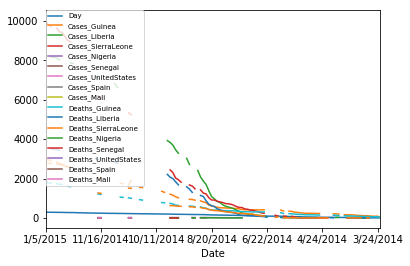

In [2]:
""" 1. 날짜(Date)의 사망자수를 그린 그래프 : x축 날짜 y축 사망자수 """

ebola.index = ebola['Date'] # Date 컬럼값으로 인덱스로 지정
ebola

# [그래프 확인결과] 그래프를 확인하면 날짜가 역순으로 되어 있음
# ebola  = ebola.reindex( reversed(ebola.index) )

fig, ax = plt.subplots()
ax = ebola.iloc[0: , 1:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.0)
plt.show()

In [68]:
""" 2. 각 나라의 발병일이 다르기에 속도 비교를 하기 어렵다 
       달리기 속도를 비교하려면 동일한 출발선에서 시작하는 것과 동일한 이치이다.
       ( 나라별 발병속도를 구하는 것이 아니라 에볼라 발병의 속도를 구하는 것이다 )
       첫 발생인 Guinea와 동일한 날짜로 맞추어야 한다
"""
# ebola_sub = ebola[['Day','Cases_Guinea','Cases_Liberia']]
# ebola_sub   # Liberia는 Guinea보다 4일 뒤에 발병시작

# Date 컬럼의 자료형을 datetime 오브젝트(시계열데이타)로 변환하여 다시 데이타 프레임 생성
# 기존의 Date 자료형 타입을 확인하고 변경후 자료형 타입을 확인
# ebola = pd.read_csv('./data/country_timeseries.csv')
# ebola.info()
ebola = pd.read_csv('./data/country_timeseries.csv', parse_dates=['Date']) 
# ebola.info()
# ebola

# 2015-01-01 날짜의 데이타가 없기에 이 날짜를 추가해야 속도가 더 정확해진다
ebola.index = ebola['Date']
new_idx = pd.date_range( ebola.index.min(), ebola.index.max())
# ebola = ebola.reindex(new_idx) # 2015-01-01 날짜 추가 확인
ebola = ebola.reindex(reversed(new_idx)) # 날짜 역순


In [69]:
""" 3. 각 나라별 발병 시작일과 마지막 일을 구하기 """
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)   # 시작일 ( 가장 오래된 데이타)

first_valid = ebola.apply(pd.Series.first_valid_index)
print(first_valid)  # 마지막 날 ( 가장 최근 데이타 )

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]
Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia       

In [70]:
""" 4. 에볼라 맨 처음 발병일 구하여 각 나라의 발병일에서 뺀다 """
earliest_date = ebola.index.min()
print(earliest_date)

shift_values = last_valid - earliest_date
print(shift_values)

2014-03-22 00:00:00
Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


In [77]:
""" 5. 각 나라의 발병일을 첫 발병일에 맞춰서 이동한다. """
ebola_dict = {}
for idx, col in enumerate(ebola):
    d = shift_values[idx].days
    ebola_dict[col] = ebola[col].shift(d)
# ebola_dict
    
ebola_shift = pd.DataFrame(ebola_dict) # 딕셔너리->데이타프레임으로 변경
ebola_shift

# Day 값을 인덱스로 하면서 그래프 그리기 적합하게 Date와 Day 컬럼을 제거한다.
ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Date','Day'], axis=1)
ebola_shift

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
2015-01-05,2015-01-05,289.0,2776.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,2015-01-04,288.0,2775.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,2015-01-03,287.0,2769.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1767.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,286.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,2014-12-31,284.0,2730.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1739.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
2014-12-30,NaT,NaN,NaN,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2014-12-29,NaT,NaN,NaN,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
2014-12-28,2014-12-28,281.0,2706.0,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,1708.0,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-27,2014-12-27,280.0,2695.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1697.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


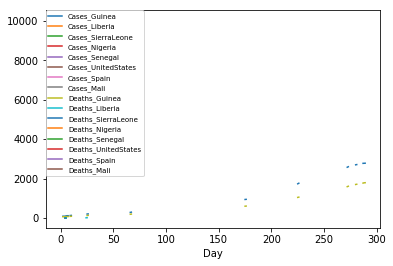

In [75]:
fig, ax = plt.subplots()
ax = ebola_shift.iloc[:,:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0)
plt.show()